## Random Graph Models

In [14]:
import numpy as np
from graspy.datasets import load_drosophila_right
from graspy.plot import heatmap
from graspy.utils import binarize, symmetrize

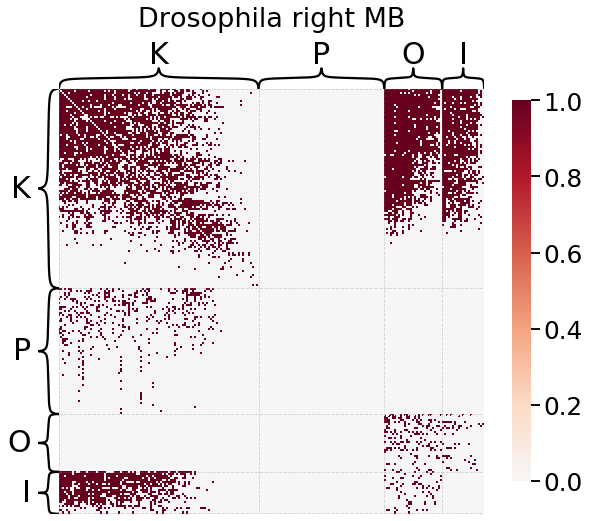

In [28]:
adj, labels = load_drosophila_right(return_labels=True)
adj = binarize(adj)
heatmap(adj, inner_hier_labels=labels,
        title="Drosophila right MB",
        font_scale=1.5,
        sort_nodes=True);

## Erdos Reyni

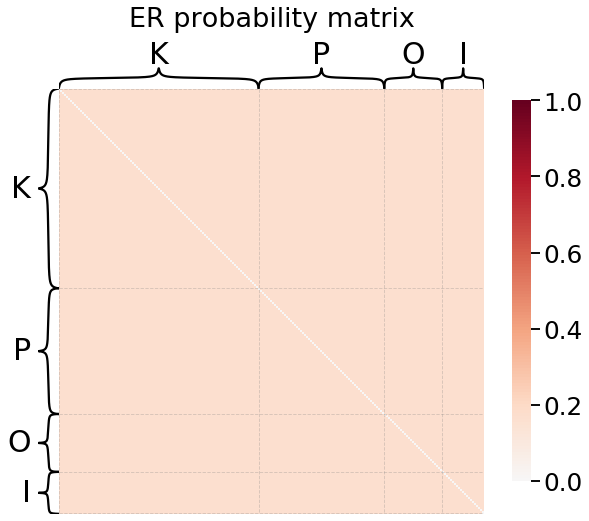

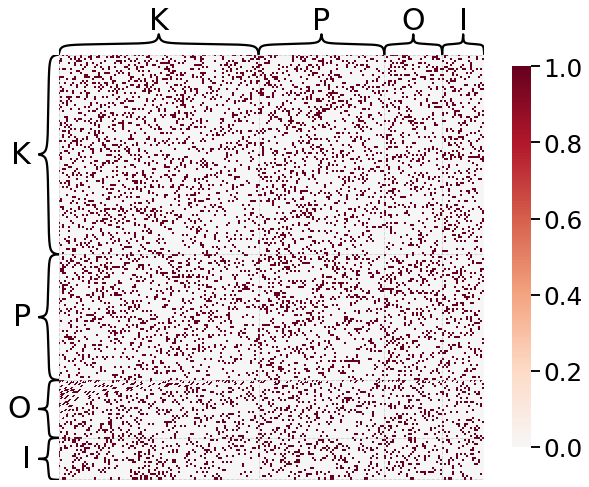

In [51]:
from graspy.models import EREstimator

er = EREstimator()
er.fit(adj)
er.p_

heatmap(er.p_mat_,
        inner_hier_labels=labels,
        font_scale=1.5,
        title="ER probability matrix",
        vmin=0, vmax=1,
        sort_nodes=True)

heatmap(er.sample()[0],
        inner_hier_labels=labels, 
        font_scale=1.5,
        sort_nodes=True)

## Degree-corrected Erdos Reyni

$P_{ij} = \theta_i\theta_jp$

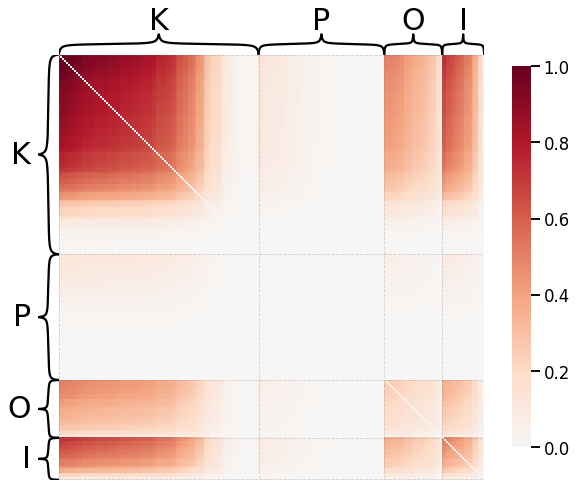

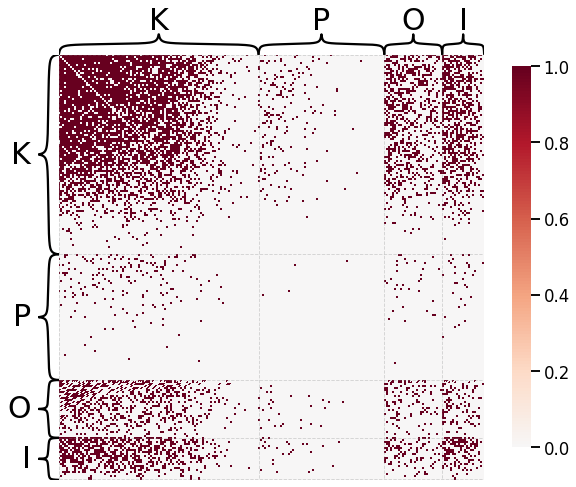

In [60]:
from graspy.models import DCEREstimator
dcer = DCEREstimator(directed=True, loops=False)
dcer.fit(adj)
heatmap(dcer.p_mat_, inner_hier_labels=labels,
        vmin=0, vmax=1, sort_nodes=True);
heatmap(dcer.sample()[0],
        inner_hier_labels=labels,
        sort_nodes=True)

## Stochastic block model (SBM)

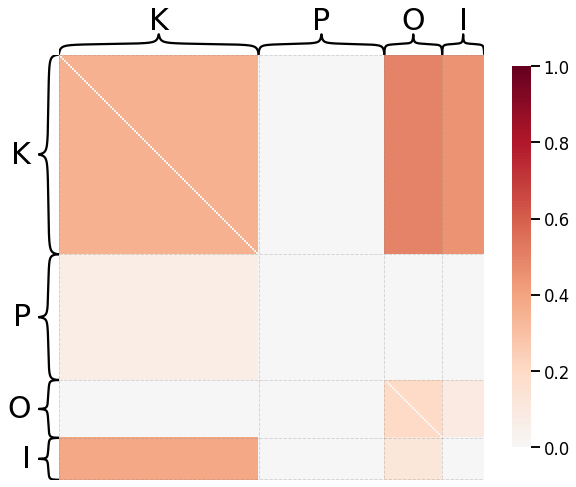

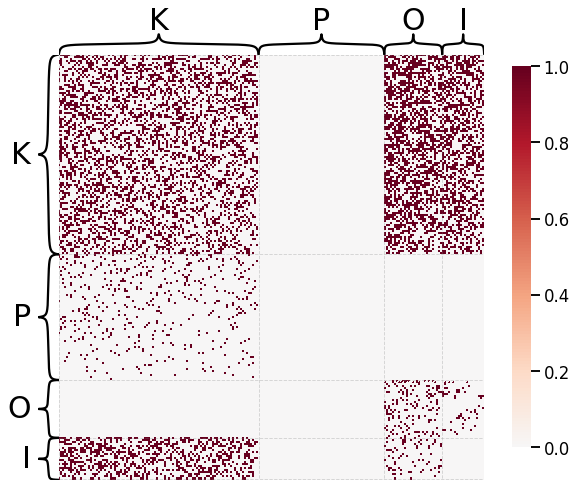

In [66]:
from graspy.models import SBMEstimator
sbme = SBMEstimator(directed=True, loops=False)
sbme.fit(adj, y=labels)

heatmap(sbme.p_mat_,
        inner_hier_labels=labels,
        vmin=0, vmax=1, sort_nodes=True
        )
heatmap(sbme.sample()[0],
        inner_hier_labels=labels,
        sort_nodes=True
        )

## Degree-corrected stochastic block model

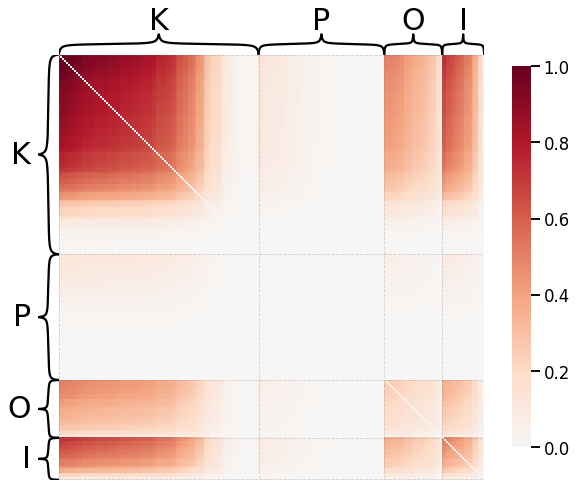

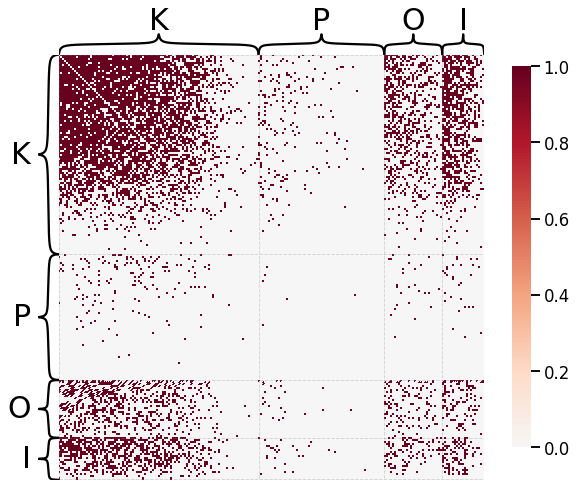

In [68]:
from graspy.models import DCSBMEstimator
dcsbme = DCEREstimator(directed=True, loops=False)
dcsbme.fit(adj, y=labels)

heatmap(dcsbme.p_mat_,
        inner_hier_labels=labels,
        vmin=0, vmax=1, sort_nodes=True
        )
heatmap(dcsbme.sample()[0],
        inner_hier_labels=labels,
        sort_nodes=True
        )

## Random dot product graph

Each node has some latent position in d-dimensional space.

Probability of a connection between node i and j is the dot product of latent positions of i and j.

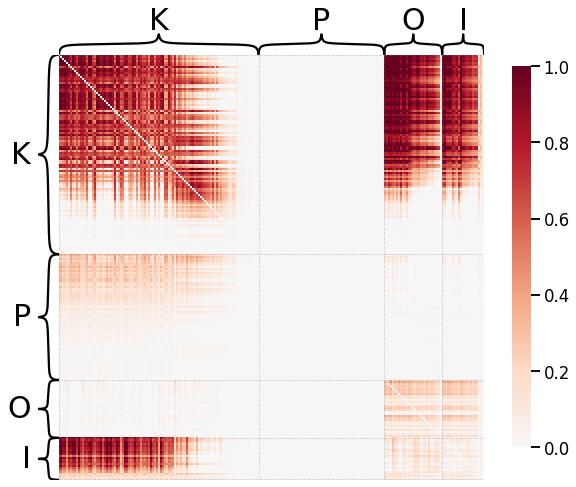

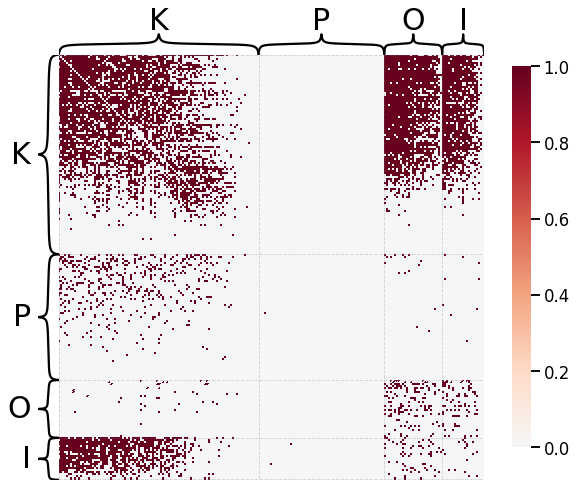

In [70]:
from graspy.models import RDPGEstimator
rdpge = RDPGEstimator(loops=False)
rdpge.fit(adj, y=labels)

heatmap(rdpge.p_mat_,
        inner_hier_labels=labels,
        vmin=0, vmax=1, sort_nodes=True
        );
heatmap(rdpge.sample()[0],
        inner_hier_labels=labels,
        sort_nodes=True
        );

## Figure with all the models

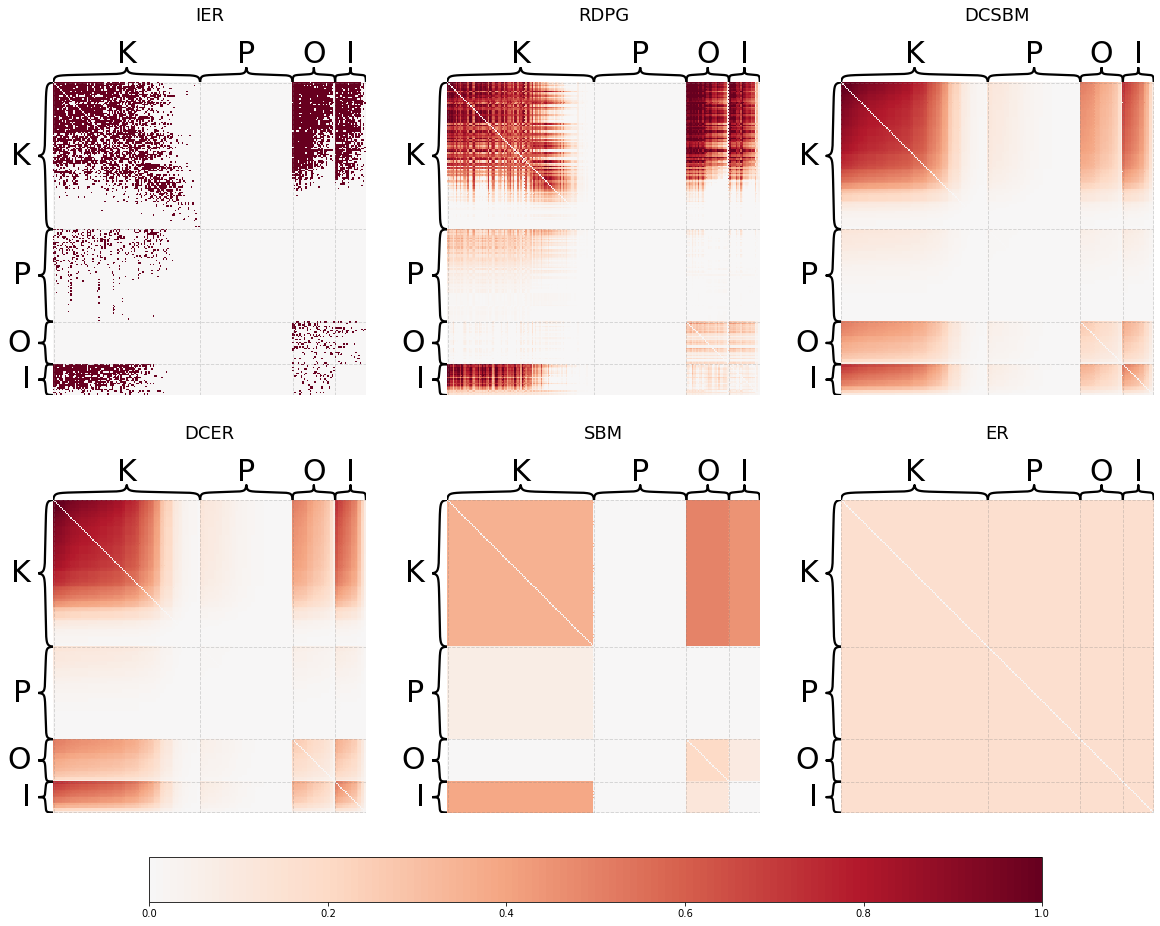

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

fig, axs = plt.subplots(2, 3, figsize=(20, 16))

# colormapping
cmap = cm.get_cmap("RdBu_r")

center = 0
vmin = 0
vmax = 1
norm = mpl.colors.Normalize(0, 1)
cc = np.linspace(0.5, 1, 256)
cmap = mpl.colors.ListedColormap(cmap(cc))

# heatmapping
heatmap_kws = dict(inner_hier_labels=labels,
                   vmin=0, vmax=1,
                   cbar=False,
                   cmap=cmap,
                   center=None,
                   sort_nodes=True)

models = [rdpge, dcsbme, dcer, sbme, er]
model_names = ["RDPG", "DCSBM", "DCER", "SBM", "ER"]

heatmap(adj, ax=axs[0,0], title="IER", **heatmap_kws)
heatmap(models[0].p_mat_, ax=axs[0][1], title=model_names[0], **heatmap_kws)
heatmap(models[1].p_mat_, ax=axs[0][2], title=model_names[1], **heatmap_kws)
heatmap(models[2].p_mat_, ax=axs[1][0], title=model_names[2], **heatmap_kws)
heatmap(models[3].p_mat_, ax=axs[1][1], title=model_names[3], **heatmap_kws)
heatmap(models[4].p_mat_, ax=axs[1][2], title=model_names[4], **heatmap_kws)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(dcsbme.p_mat_)
fig.colorbar(sm, ax=axs, orientation="horizontal", 
             pad=0.04, shrink=0.8, fraction=0.08, 
             drawedges=False)